In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns

## Dataset link
https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews


In [3]:
df = pd.read_csv("reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [32]:
print("length",len(df))
print("unique summary",len(df['Summary'].unique()))
#df['ProductId'].describe()
df['Summary'] = df['Summary'].astype('category')
df['UserId'] = df['UserId'].astype('category')
df['ProductId'] = df['ProductId'].astype('category')
df.dtypes

length 568454
unique summary 295743


Id                           int64
ProductId                 category
UserId                    category
ProfileName                 object
HelpfulnessNumerator         int64
HelpfulnessDenominator       int64
Score                        int64
Time                         int64
Summary                   category
Text                        object
dtype: object

In [37]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,27619,188646,delmartian,1,1,5,1303862400,83434,I have bought several of the Vitality canned d...
1,2,72383,25105,dll pa,0,0,1,1346976000,167649,Product arrived labeled as Jumbo Salted Peanut...
2,3,15267,210482,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,126,This is a confection that has been around a fe...
3,4,19718,152635,Karl,3,3,2,1307923200,47071,If you are looking for the secret ingredient i...
4,5,69007,57804,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,107323,Great taffy at a great price. There was a wid...


In [47]:
features = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time','Summary', 'UserId','ProductId']
cols = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time','Summary', 'UserId','ProductId','Score']
df=df[cols]
X = df.loc[:, features]
y= df.loc[:,'Score']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .7)

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397917 entries, 333546 to 305711
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   HelpfulnessNumerator    397917 non-null  int64
 1   HelpfulnessDenominator  397917 non-null  int64
 2   Time                    397917 non-null  int64
 3   Summary                 397917 non-null  int32
 4   UserId                  397917 non-null  int32
 5   ProductId               397917 non-null  int32
dtypes: int32(3), int64(3)
memory usage: 16.7 MB


In [50]:
X_train.isnull().sum()

HelpfulnessNumerator      0
HelpfulnessDenominator    0
Time                      0
Summary                   0
UserId                    0
ProductId                 0
dtype: int64

In [51]:
## Show Xtrain Describe
X_train.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,UserId,ProductId
count,397917.000000,397917.000000,3.979170e+05,397917.000000,397917.000000,397917.000000
mean,1.749078,2.231827,1.296217e+09,148312.345916,128555.180357,34785.412126
std,7.743817,8.387483,4.809582e+07,85100.280409,73636.071812,21229.398155
min,0.000000,0.000000,9.393408e+08,-1.000000,2.000000,0.000000
25%,0.000000,0.000000,1.271290e+09,75314.000000,65145.000000,15989.000000
50%,0.000000,1.000000,1.311120e+09,145076.000000,128547.000000,32923.000000
75%,2.000000,2.000000,1.332720e+09,223306.000000,192151.000000,51391.000000
max,866.000000,923.000000,1.351210e+09,295740.000000,256058.000000,74256.000000


(array([2.7000e+01, 2.6000e+01, 4.8000e+01, 4.7600e+02, 1.6390e+03,
        1.3131e+04, 2.7437e+04, 5.2910e+04, 9.9863e+04, 2.0236e+05]),
 array([9.39340800e+08, 9.80527680e+08, 1.02171456e+09, 1.06290144e+09,
        1.10408832e+09, 1.14527520e+09, 1.18646208e+09, 1.22764896e+09,
        1.26883584e+09, 1.31002272e+09, 1.35120960e+09]),
 <BarContainer object of 10 artists>)

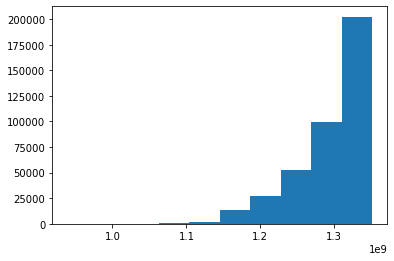

In [52]:
plt.hist(X_train['Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20921aefa60>,
 'caps': [<matplotlib.lines.Line2D at 0x20921aff1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20921aef6d0>,
 'medians': [<matplotlib.lines.Line2D at 0x20921aff8e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x20921affc70>,
 'means': []}

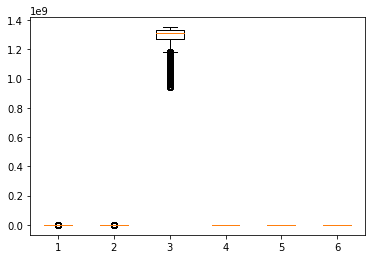

In [53]:
### Show boxplot of features
plt.boxplot(X_train)

In [45]:
### Show correlation
X_train.corr()

,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,UserId,ProductId
HelpfulnessNumerator,1.000000,0.976223,-0.153102,-0.005489,-0.005428,-0.032285
HelpfulnessDenominator,0.976223,1.000000,-0.171041,-0.000938,-0.004843,-0.037050
Time,-0.153102,-0.171041,1.000000,0.001376,0.000062,0.417867
Summary,-0.005489,-0.000938,0.001376,1.000000,0.000256,-0.006606
UserId,-0.005428,-0.004843,0.000062,0.000256,1.000000,-0.000182
ProductId,-0.032285,-0.037050,0.417867,-0.006606,-0.000182,1.000000


<AxesSubplot:>

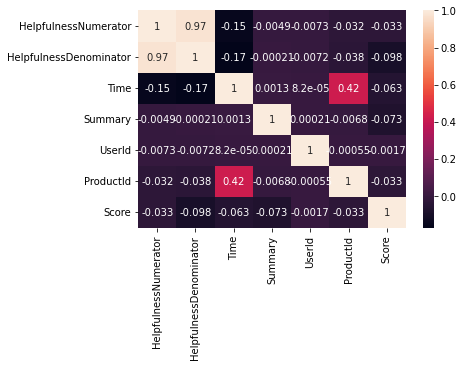

In [69]:
sns.heatmap(df.corr(), annot=True)

## Select most influential variables
I select time, helpfulness and Userid

## Plot a correlation of most influential features with the target variable

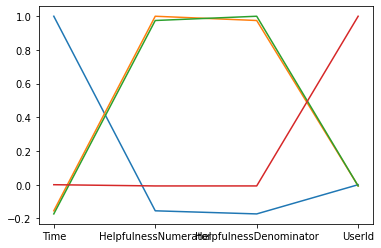

In [63]:
cols = ['Time', 'HelpfulnessNumerator','HelpfulnessDenominator','UserId']
plt.plot(df[cols].corr())

## Create model


In [66]:
dtree = DecisionTreeClassifier()
dtree.fit(X.values,y.values)

DecisionTreeClassifier()

In [67]:
dtree.predict(X_test[0:10])

D:\Programs\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([5, 5, 5, 5, 2, 5, 4, 4, 5, 3], dtype=int64)

In [68]:
# get the score
score = dtree.score(X_test, y_test)
score

D:\Programs\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.9999941361698634